In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [3]:
bond_df = pd.read_csv('extracted_au_data.csv', sep=";")
bond_df.columns = ["model_name", "predictors", "aug_num", "aug_size", "lookback", "dropout", "type", "t", "p", "l", "r_5", "r", "r_95"]
bond_df.describe()

,aug_num,aug_size,lookback,dropout,t,p,l,r_5,r,r_95
count,749.0,7.490000e+02,749.000000,749.000000,749.000000,7.490000e+02,749.000000,749.000000,749.000000,749.000000
mean,50.0,2.000000e-01,2.002670,0.280374,3.220518,6.622849e-02,183.494464,172.787874,184.492143,196.908982
std,0.0,5.554825e-17,1.414211,0.171971,9.166906,1.874103e-01,34.500425,24.886677,34.331123,45.872692
min,50.0,2.000000e-01,0.000000,0.000000,-19.809182,1.360353e-53,150.659566,155.141438,162.034658,162.819266
25%,50.0,2.000000e-01,1.000000,0.200000,-3.523207,1.781244e-19,166.625976,162.837559,168.275796,172.482610
50%,50.0,2.000000e-01,2.000000,0.300000,2.177160,1.814646e-08,172.105934,166.365567,174.044596,181.813427
75%,50.0,2.000000e-01,3.000000,0.400000,9.457521,3.607669e-03,182.841460,171.633272,183.279339,200.719392
max,50.0,2.000000e-01,4.000000,0.500000,31.658328,9.941130e-01,492.404555,507.282987,580.598053,669.575634


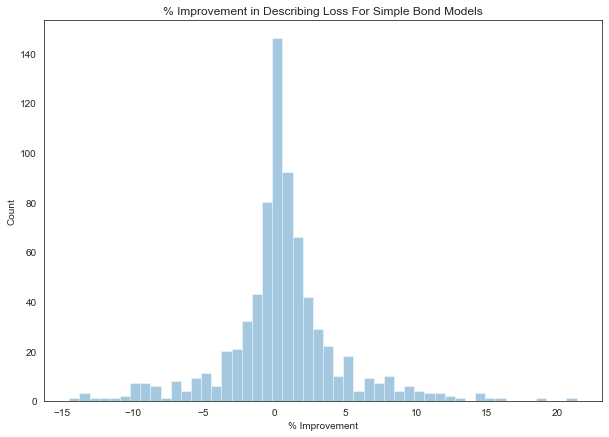

In [4]:
bond_df['improvement'] = (bond_df['r'] - bond_df['l']) / bond_df['r'] * 100

fig = plt.figure(figsize=(10,7))
sns.distplot(bond_df['improvement'], kde=False, ax=fig.gca())
plt.title('% Improvement in Describing Loss For Simple Bond Models')
plt.ylabel('Count')
plt.xlabel('% Improvement')
plt.show()

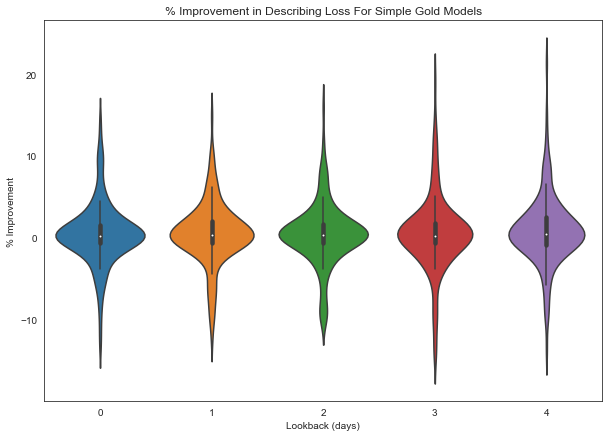

In [7]:
fig = plt.figure(figsize=(10,7))
sns.violinplot(x=bond_df['lookback'], y=bond_df['improvement'], ax=fig.gca())
plt.title('% Improvement in Describing Loss For Simple Gold Models')
plt.ylabel('% Improvement')
plt.xlabel('Lookback (days)')
plt.show()

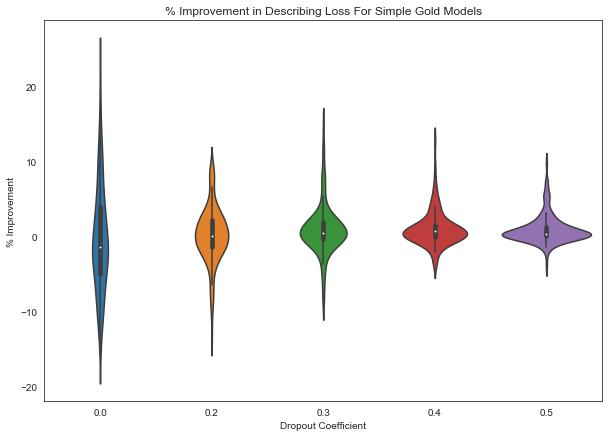

In [8]:
fig = plt.figure(figsize=(10,7))
sns.violinplot(x=bond_df['dropout'], y=bond_df['improvement'], ax=fig.gca())
plt.title('% Improvement in Describing Loss For Simple Gold Models')
plt.ylabel('% Improvement')
plt.xlabel('Dropout Coefficient')
plt.show()

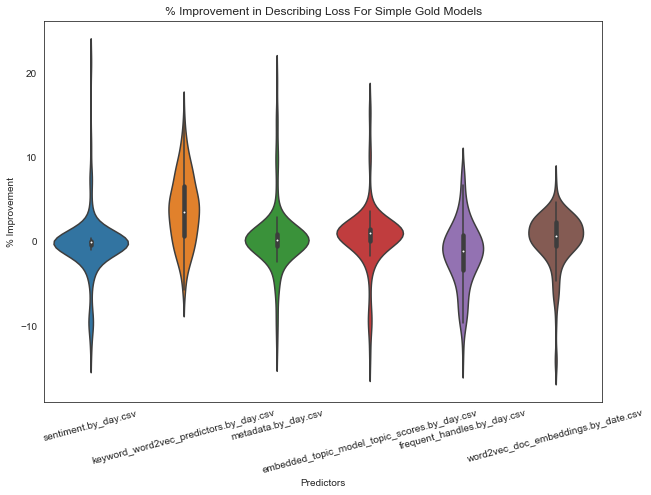

In [11]:
fig = plt.figure(figsize=(10,7))
ax = sns.violinplot(x=bond_df['predictors'], y=bond_df['improvement'], ax=fig.gca())

ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.title('% Improvement in Describing Loss For Simple Gold Models')
plt.ylabel('% Improvement')
plt.xlabel('Predictors')
plt.show()

In [13]:
bond_df.iloc[np.argsort(bond_df['improvement'])].tail(20)

,model_name,predictors,aug_num,aug_size,lookback,dropout,type,t,p,l,r_5,r,r_95,improvement
289,model_1751,embedded_topic_model_topic_scores.by_day.csv,50,0.2,0,0.0,regressor,15.274756,8.811228e-28,171.389193,168.609722,190.494095,210.507231,10.029131
430,model_201,keyword_word2vec_predictors.by_day.csv,50,0.2,0,0.0,regressor,16.390523,5.815068e-30,166.458451,166.803468,185.058428,203.522750,10.050867
259,model_1471,metadata.by_day.csv,50,0.2,2,0.0,regressor,10.868728,1.406235e-18,260.924723,250.093978,290.302421,331.954812,10.119688
429,model_1,keyword_word2vec_predictors.by_day.csv,50,0.2,0,0.0,regressor,16.586049,2.451672e-30,175.721380,177.424393,196.276252,217.315628,10.472419
86,model_115,keyword_word2vec_predictors.by_day.csv,50,0.2,1,0.3,regressor,19.836562,2.890594e-36,159.399923,163.424128,178.340389,194.077108,10.620402
446,model_231,keyword_word2vec_predictors.by_day.csv,50,0.2,3,0.0,regressor,15.898575,5.218925e-29,173.483209,174.577803,195.177495,222.664746,11.115157
197,model_135,keyword_word2vec_predictors.by_day.csv,50,0.2,3,0.3,regressor,22.300774,2.183459e-40,159.844618,165.986583,180.219732,197.235583,11.305706
132,model_1241,sentiment.by_day.csv,50,0.2,4,0.0,regressor,11.808058,1.321546e-20,380.092580,371.803623,429.000395,504.700779,11.400413
417,model_1981,embedded_topic_model_topic_scores.by_day.csv,50,0.2,3,0.0,regressor,12.689216,1.761597e-22,201.920578,196.437027,228.553874,263.231510,11.652962
441,model_221,keyword_word2vec_predictors.by_day.csv,50,0.2,2,0.0,regressor,19.228538,3.360154e-35,166.437319,170.749705,188.735297,204.356615,11.814419
